# 02 - Plotting Wilshire REIT Index

The purpose of this notebook is to grab Wilshire REIT Index data from FRED and visualize the time series.

### Loading Packages

Let's begin by loading the packages that we will need.

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

### Grabbing Data from FRED

The Wilshire REIT Index is an index that tracks much of the publicly traded REIT market in the United States.  Some kinds of REITs are included, including mortgage REITs.

The FRED code for the Wilshire Total Market Index (which includes reinvested dividends) is `WILLREITIND`

The function for retrieving data from FRED is `pdr.get_data_fred()`.

Let's graph the data for 2014-2019.

In [2]:
df_wilsh = pdr.get_data_fred('WILLREITIND', start = '2014-01-01', end = '2019-01-01')
df_wilsh.head()

,WILLREITIND
DATE,
2014-01-01,NaN
2014-01-02,6463.52
2014-01-03,6512.96
2014-01-06,6541.69
2014-01-07,6560.74


By default, `pandas_datareader` sets the `Date` column as the index, which I don't like, so I'll use the `.reset_index()` method to take care of this.

In [3]:
df_wilsh.reset_index(inplace = True)
df_wilsh.head()

,DATE,WILLREITIND
0,2014-01-01,NaN
1,2014-01-02,6463.52
2,2014-01-03,6512.96
3,2014-01-06,6541.69
4,2014-01-07,6560.74


I prefer that my column names have all lower case letters.

In [4]:
df_wilsh.columns = df_wilsh.columns.str.lower()
df_wilsh.head()

,date,willreitind
0,2014-01-01,NaN
1,2014-01-02,6463.52
2,2014-01-03,6512.96
3,2014-01-06,6541.69
4,2014-01-07,6560.74


In [5]:
df_wilsh.rename(columns={'willreitind':'adj_close'}, inplace=True)
df_wilsh.head()

,date,adj_close
0,2014-01-01,NaN
1,2014-01-02,6463.52
2,2014-01-03,6512.96
3,2014-01-06,6541.69
4,2014-01-07,6560.74


## Plotting Adjusted Close

Now that we have the data in at `DataFrame` we can use some built-in `.plot()` function to visualize the `adj_close` price. 

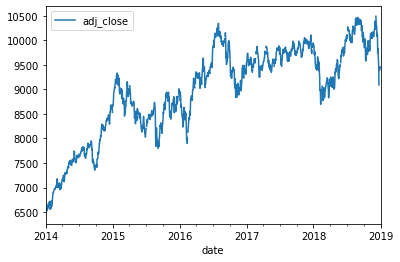

In [6]:
df_wilsh.plot(x='date', y='adj_close');

As you can see, the graph doesn't look that great with the default settings.  Let's change these settings a bit to make the plot look better.

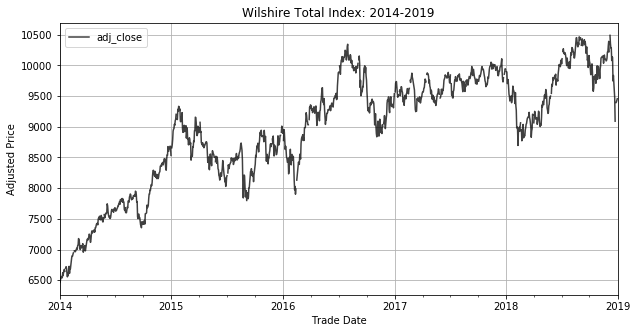

In [7]:
ax = df_wilsh.\
        plot(
            x = 'date',
            y = 'adj_close', 
            title = 'Wilshire Total Index: 2014-2019',
            grid = True,
            figsize = (10, 5),
            style = 'k',
            alpha = 0.75,
        );
ax.set_xlabel('Trade Date');
ax.set_ylabel('Adjusted Price');

### Further Reading

Check out my Tutorials 12-14 for more about data visualization.